# Non-negative Matrix Factorization: _Movie Recommendation_
_"What movie should I watch this evening?"_

---

The objective of this tutorial is to use in practice Non-Negative Matrix Factorization (NMF). More precisely, we will build a movie recommendation system, which is a standard problem where NMF is used.
Here, we apply NMF to user-item matrix, representing the ratings of different persons for different movies. The goal is to make good use of these data to predict the movies that a new user is likely to like.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

import seaborn as sns
sns.set_theme(style="darkgrid")

___

## Data exploration

For this study, you will need to download the [MovieLens](https://en.wikipedia.org/wiki/MovieLens) dataset from the Grouplens site [grouplens.org/datasets/movielens](https://grouplens.org/datasets/movielens/). There are several datasets available on this page. In order to keep the digital cost under control, we will download [MovieLens 100k Dataset ](https://grouplens.org/datasets/movielens/100k/).

The MovieLens datasets were collected by the GroupLens Research Project at the University of [Minnesota Harper and Konstan (2015)](https://dl.acm.org/doi/10.1145/2827872). The data was collected through the MovieLens web site between September 19th, 1997 and April 22nd, 1998. Users who had less than 20 ratings or did not have complete demographic information were removed from this dataset. More information about this dataset can be found in the [ml-100k-README.txt](https://files.grouplens.org/datasets/movielens/ml-100k-README.txt) page on the Grouplens page.

### Load the dataset

##### <span style="color:purple">**Todo:** Download and unzip the `ml-100k.zip` file.</span>

This "small" dataset consists of 100 000 ratings. Each user has rated at least 20 movies. Simple demographic info for the users (age, gender, occupation) are also available.

##### <span style="color:purple">**Todo:** Read the `u.data` file using the `read_csv` method.</span>

We will only use the first three columns, which correspond respectively to `User_ID`, `Movie ID` and `Rating`.

In [ ]:
### TO BE COMPLETED ### 

names = ['User ID', 'Movie ID', 'Rating']
ratings_df = ...

In [3]:
# %load solutions/load_ratings.py
names = ['User ID', 'Movie ID', 'Rating']
ratings_df = pd.read_csv("ml-100k/u.data", sep="\t", usecols=[0,1,2], names=names)

ratings_df.head()

,User ID,Movie ID,Rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


##### <span style="color:purple">**Todo:** Check that the dataset contains 100k ratings.</span>

1. How many different users are in this dataset? 
2. How many different movies did they rate? 

In [ ]:
### TO BE COMPLETED ### 

n_ratings = ...
n_users = ...
n_items = ...

print("Total number of ratings in the dataset: %i" % (n_ratings))
print("Number of persons who rated movies: %i" % (n_users))
print("Number of rated movies: %i" % (n_items))

In [5]:
# %load solutions/check_dataset.py
n_ratings = ratings_df.shape[0]
n_users = len(ratings_df["User ID"].unique())
n_items = len(ratings_df["Movie ID"].unique())

print("Total number of ratings in the dataset: %i" % (n_ratings))
print("Number of persons who rated movies: %i" % (n_users))
print("Number of rated movies: %i" % (n_items))

Total number of ratings in the dataset: 100000
Number of persons who rated movies: 943
Number of rated movies: 1682


### Distribution of the ratings

##### <span style="color:purple">**Todo:** Study the distribution of ratings.</span>

1. On what scale are the ratings given?
2. What is the mean score? median?

You may use the `describe()` method.

In [ ]:
### TO BE COMPLETED ### 
# Statistics of the ratings

ratings_df["Rating"].describe()

[...]

In [7]:
# %load solutions/stats_ratings.py
print(ratings_df["Rating"].describe())

print('\n_____ \n')

ratings = ratings_df["Rating"]
print("Range of ratings: %i to %i" % (ratings.min(), ratings.max()))
print("Mean score: %f" % (ratings.mean()))
print("Median score: %f" % (ratings.median()))

count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: Rating, dtype: float64

_____ 

Range of ratings: 1 to 5
Mean score: 3.529860
Median score: 4.000000


##### <span style="color:purple">**Todo:** Plot the histogram of the ratings.</span>

Should we normalize these values before applying NMF?

In [ ]:
### TO BE COMPLETED ### 
# Histogram of the ratings

[...]

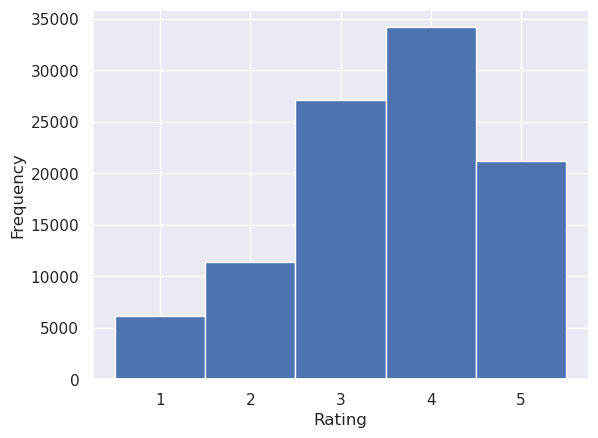

In [19]:
# %load solutions/hists_ratings.py
plt.hist(ratings_df["Rating"], bins=range(1, 7), align="left")
plt.xlabel("Rating")
plt.ylabel("Frequency")
plt.grid(True)

### Ratings per user

##### <span style="color:purple">**Todo:** Plot the histogram representing the number of ratings per user.</span>

In [ ]:
### TO BE COMPLETED ### 
# Histogram of the ratings per user

users_list = ...
n_ratings_ind = ... # Number of movies rated by the user i
n_ratings_ind = np.array(n_ratings_ind)

[...]

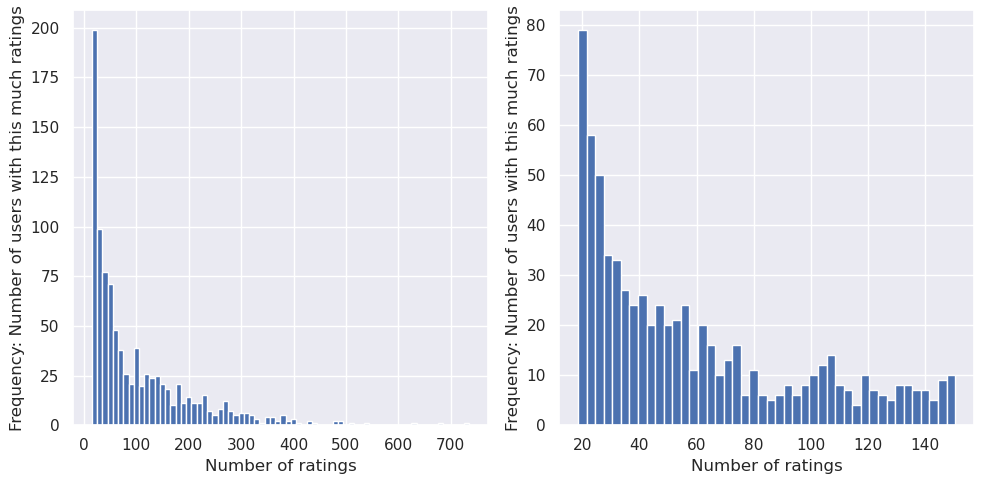

In [20]:
# %load solutions/hists_ratings_user.py
users_list = range(1, n_users+1)
n_ratings_ind = [np.count_nonzero(ratings_df["User ID"] == i) for i in users_list]
n_ratings_ind = np.array(n_ratings_ind)

# ----- #

binwidth_all = 10
bins_all = np.arange(min(n_ratings_ind), max(n_ratings_ind)+binwidth_all, binwidth_all)

threshold = 150
binwidth_threshold = 3
bins_threshold = np.arange(min(n_ratings_ind), 150+binwidth_threshold, binwidth_threshold)

# ----- #

plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.hist(n_ratings_ind, bins=bins_all, align="left")
plt.xlabel("Number of ratings")
plt.ylabel("Frequency: Number of users with this much ratings")

plt.subplot(1,2,2)
plt.hist(n_ratings_ind, bins=bins_threshold, align="left")
plt.xlabel("Number of ratings")
plt.ylabel("Frequency: Number of users with this much ratings")

plt.tight_layout()
plt.show()

##### <span style="color:purple">**Question:** How many movies did people rate on average?</span>

Other statistics: min, max, median, quartiles?

In [ ]:
### TO BE COMPLETED ### 
# Statistics of the ratings per user

[...]

In [27]:
# %load solutions/stats_ratings_user.py
pd.DataFrame(n_ratings_ind).describe()

,0
count,943.000000
mean,106.044539
std,100.931743
min,20.000000
25%,33.000000
50%,65.000000
75%,148.000000
max,737.000000


##### <span style="color:purple">**Question:** What is the profile of the user who has rated the most films?</span>

The `u.user` file contains the demographic information for each user. We load it with the command below.

In [30]:
# Loading demographic information about the users

names = ['User ID', 'Age', 'Gender', 'Occupation']
users_df = pd.read_csv("ml-100k/u.user", sep="|", header=None, usecols=[0,1,2,3], 
                           encoding='iso-8859-1', names=names)

users_df.head()

,User ID,Age,Gender,Occupation
0,1,24,M,technician
1,2,53,F,other
2,3,23,M,writer
3,4,24,M,technician
4,5,33,F,other


In [ ]:
### TO BE COMPLETED ### 
# User who rated the most films

[...]

In [40]:
# %load solutions/max_ratings.py
max_ratings = n_ratings_ind.max()
user_max_ratings = users_df[users_df['User ID']==n_ratings_ind.argsort()[-1]]

A = user_max_ratings.iloc[0]['Age']
G = user_max_ratings.iloc[0]['Gender']
O = user_max_ratings.iloc[0]['Occupation']

if G=='F':
    G = 'female'
else:
    G = 'male'

print("The user who rated the most films is a %i year old" % A, G, O)
#print(f"The user who rated the most films is a {A} year old {G} {O}") 
print("He/She has rated %i movies" % max_ratings)

The user who rated the most films is a 29 year old female programmer
The user who rated the most films is a 29 year old female programmer
He/She has rated 737 movies


### Average ratings per movie

##### <span style="color:purple">**Todo:** Plot the histogram representing the average rating per movie.</span>

In [ ]:
### TO BE COMPLETED ### 
# Histogram of the ratings per user

movies_list = ...
mean_ratings = ... # Average rating of the k-th movie

[...]

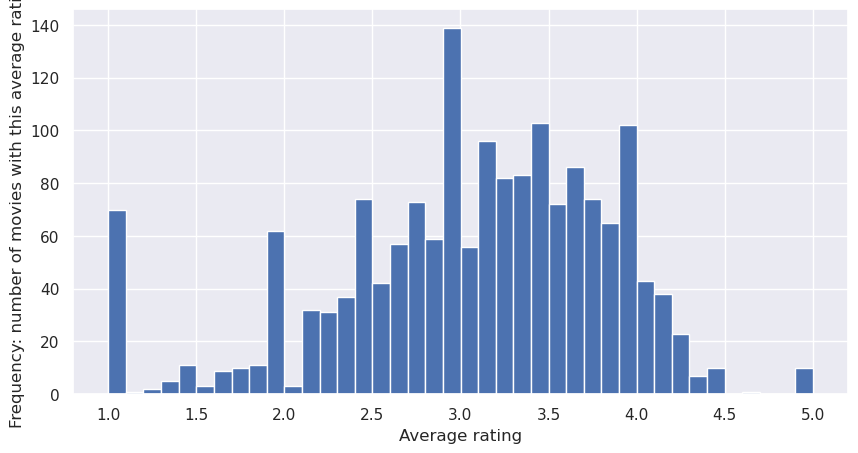

In [42]:
# %load solutions/hists_ratings_movie.py
movies_list = range(1, n_items+1)
mean_ratings = [ratings_df["Rating"][ratings_df["Movie ID"] == i].mean() for i in movies_list]
mean_ratings = np.array(mean_ratings)

binwidth = .1
bins = np.arange(min(mean_ratings), max(mean_ratings)+binwidth, binwidth)

plt.figure(figsize=(10,5))

plt.hist(mean_ratings, bins=bins, align="mid")
plt.xlabel("Average rating")
plt.ylabel("Frequency: number of movies with this average rating")

plt.show()

##### <span style="color:purple">**Todo:** Find movies with ratings 1 and 5.</span>

The movie titles can be read from the `u.item` file, using the following line of code: 

In [44]:
# Loading movies' genre
genre_df = pd.read_csv("ml-100k/u.genre", sep="|", header=None, usecols=[0], encoding='latin-1', names=["Genre"])
genre = genre_df.values.squeeze().tolist()

# Loading movies 
cols = [1] + np.arange(5,24).tolist()
names = ["Title"] + np.arange(19).tolist()
movies_df = pd.read_csv("ml-100k/u.item", sep="|", header=None, usecols=cols, encoding='iso-8859-1', names=names)

# Each movie is assigned its first genre encountered in the list, in alphabetical order (arbitrary choice).
movies_df.insert(1, "Genre", movies_df.eq(1).idxmax(axis=1).values.squeeze().tolist(), True)

# Rename dataframe columns
movies_df.columns = ["Title","Genre"]+genre

movies_df.head()
# movies_df['Title'].head()

,Title,Genre,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story (1995),3,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,GoldenEye (1995),1,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,Four Rooms (1995),16,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,Get Shorty (1995),1,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Copycat (1995),6,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


In [ ]:
### TO BE COMPLETED ### 
# Example of a *bad* and a *good* movie

[...]

In [48]:
# %load solutions/bad_good_movies.py
bad_movies, good_movies = [], []
for i in range(len(mean_ratings)):
    if mean_ratings[i] == 1:
        bad_movies.append(movies_df["Title"][i])
    if mean_ratings[i] == 5:
        good_movies.append(movies_df["Title"][i])

print("Flop - Example of movie with rating of 1:", np.random.choice(bad_movies))
print("Masterpiece - Example of movie with rating of 5:", np.random.choice(good_movies))

Flop - Example of movie with rating of 1: Invitation, The (Zaproszenie) (1986)
Masterpiece - Example of movie with rating of 5: They Made Me a Criminal (1939)


## Applying Non-negative Matrix Factorization (NMF)

Most recommendation models consist in building a user-by-item matrix with some sort of "interaction"
number in each cell. Here, users give items numerical ratings, this is called an explicit feedback model.

In [49]:
from scipy import sparse

### User-item matrix

<a id='user-item-matrix'></a>

##### <span style="color:purple">**Todo:** Build the user-item matrix for the movie rating problem studied here.</span>

- We can use the [`scipy.sparse.csr_matrix`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html) function to build a sparse matrix. This matrix can then be converted to dense using the `todense()` method.
- Note that there is no user '0' in the dataset.

<br>

The command `print(R[:10,:20])` returns
```
[[5 3 4 3 3 5 4 1 5 3 2 5 5 5 5 5 3 4 5 4]
 [4 0 0 0 0 0 0 0 0 2 0 0 4 4 0 0 0 0 3 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 4 0 0 0 0 0 0 0 0 0]
 [4 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 0 0]
 [4 0 0 0 0 0 2 4 4 0 0 4 2 5 3 0 0 0 4 0]
 [0 0 0 5 0 0 5 5 5 4 3 5 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 3 0 0 0 3 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 5 4 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [4 0 0 4 0 0 4 0 4 0 4 5 3 0 0 4 0 0 0 0]]
```
What should be the size of this matrix ?

In [ ]:
### TO BE COMPLETED ### 
# R user-item matrix

[...]

In [51]:
# %load solutions/R_matrix.py
users = ratings_df["User ID"].values
movies = ratings_df["Movie ID"].values
ratings = ratings_df["Rating"].values

matrix_sparse = sparse.csr_matrix((ratings, (users, movies)), shape=(n_users+1, n_items+1))
R = matrix_sparse.todense()
R = np.array(R[1:, 1:])

##### <span style="color:purple">**Todo:** Choose a pair (user,movie) and check that the rating in the R-matrix matches the rating in the dataset.</span>

For example, we can look at the first row of the dataset.

In [ ]:
### TO BE COMPLETED ### 

[...]

In [53]:
# %load solutions/R_matrix_check.py
print(ratings_df.head())
print("")
print("Verify rating of user 196 for movie 242 (first row in data file): ", R[195, 241])

   User ID  Movie ID  Rating
0      196       242       3
1      186       302       3
2       22       377       1
3      244        51       2
4      166       346       1

Verify rating of user 196 for movie 242 (first row in data file):  3


##### <span style="color:purple">**Question:** What is the sparsity, _i.e._ the proportion of zeros, of the matrix obtained?</span>

- We can use the [`nonzero()`](https://numpy.org/doc/stable/reference/generated/numpy.nonzero.html) method.

What are your thoughts on this? Does it interfere with the chosen scoring system?

In [ ]:
### TO BE COMPLETED ### 

[...]

In [55]:
# %load solutions/R_matrix_sparsity.py
sparsity = 1 - len(R.nonzero()[0]) / (R.shape[0] * R.shape[1])
print("Sparsity of R: %0.2f%%" % (sparsity * 100))

Sparsity of R: 93.70%


### Implementation of NMF decomposition

In [58]:
from sklearn.decomposition import NMF

##### <span style="color:purple">**Todo:** Apply NMF with 20 components.</span>

1. How many iterations to convergence?
2. Verify the shape of the feature matrix representing the different movies.
3. Verify the shape of the feature matrix representing the different users.

In [ ]:
### TO BE COMPLETED ### 
# NMF decomposition

[...]

In [89]:
# %load solutions/nmf.py
nmf = NMF(n_components=20, init='nndsvda', max_iter=int(1e3))
nmf.fit(R)
W = nmf.transform(R)
H = nmf.components_

print("Number of iterations: ", nmf.n_iter_)
print("Movies features shape (transpose(H)): ", H.T.shape)
print("Users features shape (W): ", W.shape)
print("Reconstruction of R shape (W.H): ", W.dot(H).shape)

Number of iterations:  631
Movies features shape (transpose(H)):  (1682, 20)
Users features shape (W):  (943, 20)
Reconstruction of R shape (W.H):  (943, 1682)


### Topics of the different components 

The cell below displays the titles of the films most "strongly" associated with each of the 20 components of the decomposition. 

<a id='topic_plot'></a>

In [90]:
from matplotlib import colors

For each of the "topics" found in the decomposition, we will represent the films that contribued most to it, colored according to their genre. To do this, we will use the color palette below.

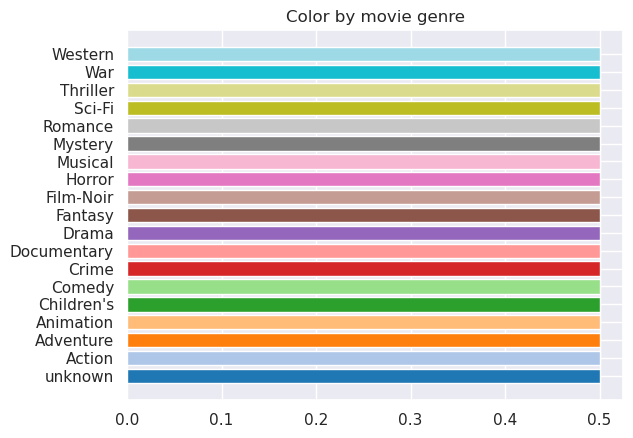

In [91]:
cmap = plt.get_cmap('tab20', len(genre))
plt.barh(genre, .5, color=cmap.colors, label=genre)

plt.title("Color by movie genre")
plt.show()

##### <span style="color:purple">**Question:** What do you think about the resulting decomposition?</span>

- Comment the above figure.
- What does the bar length represent?

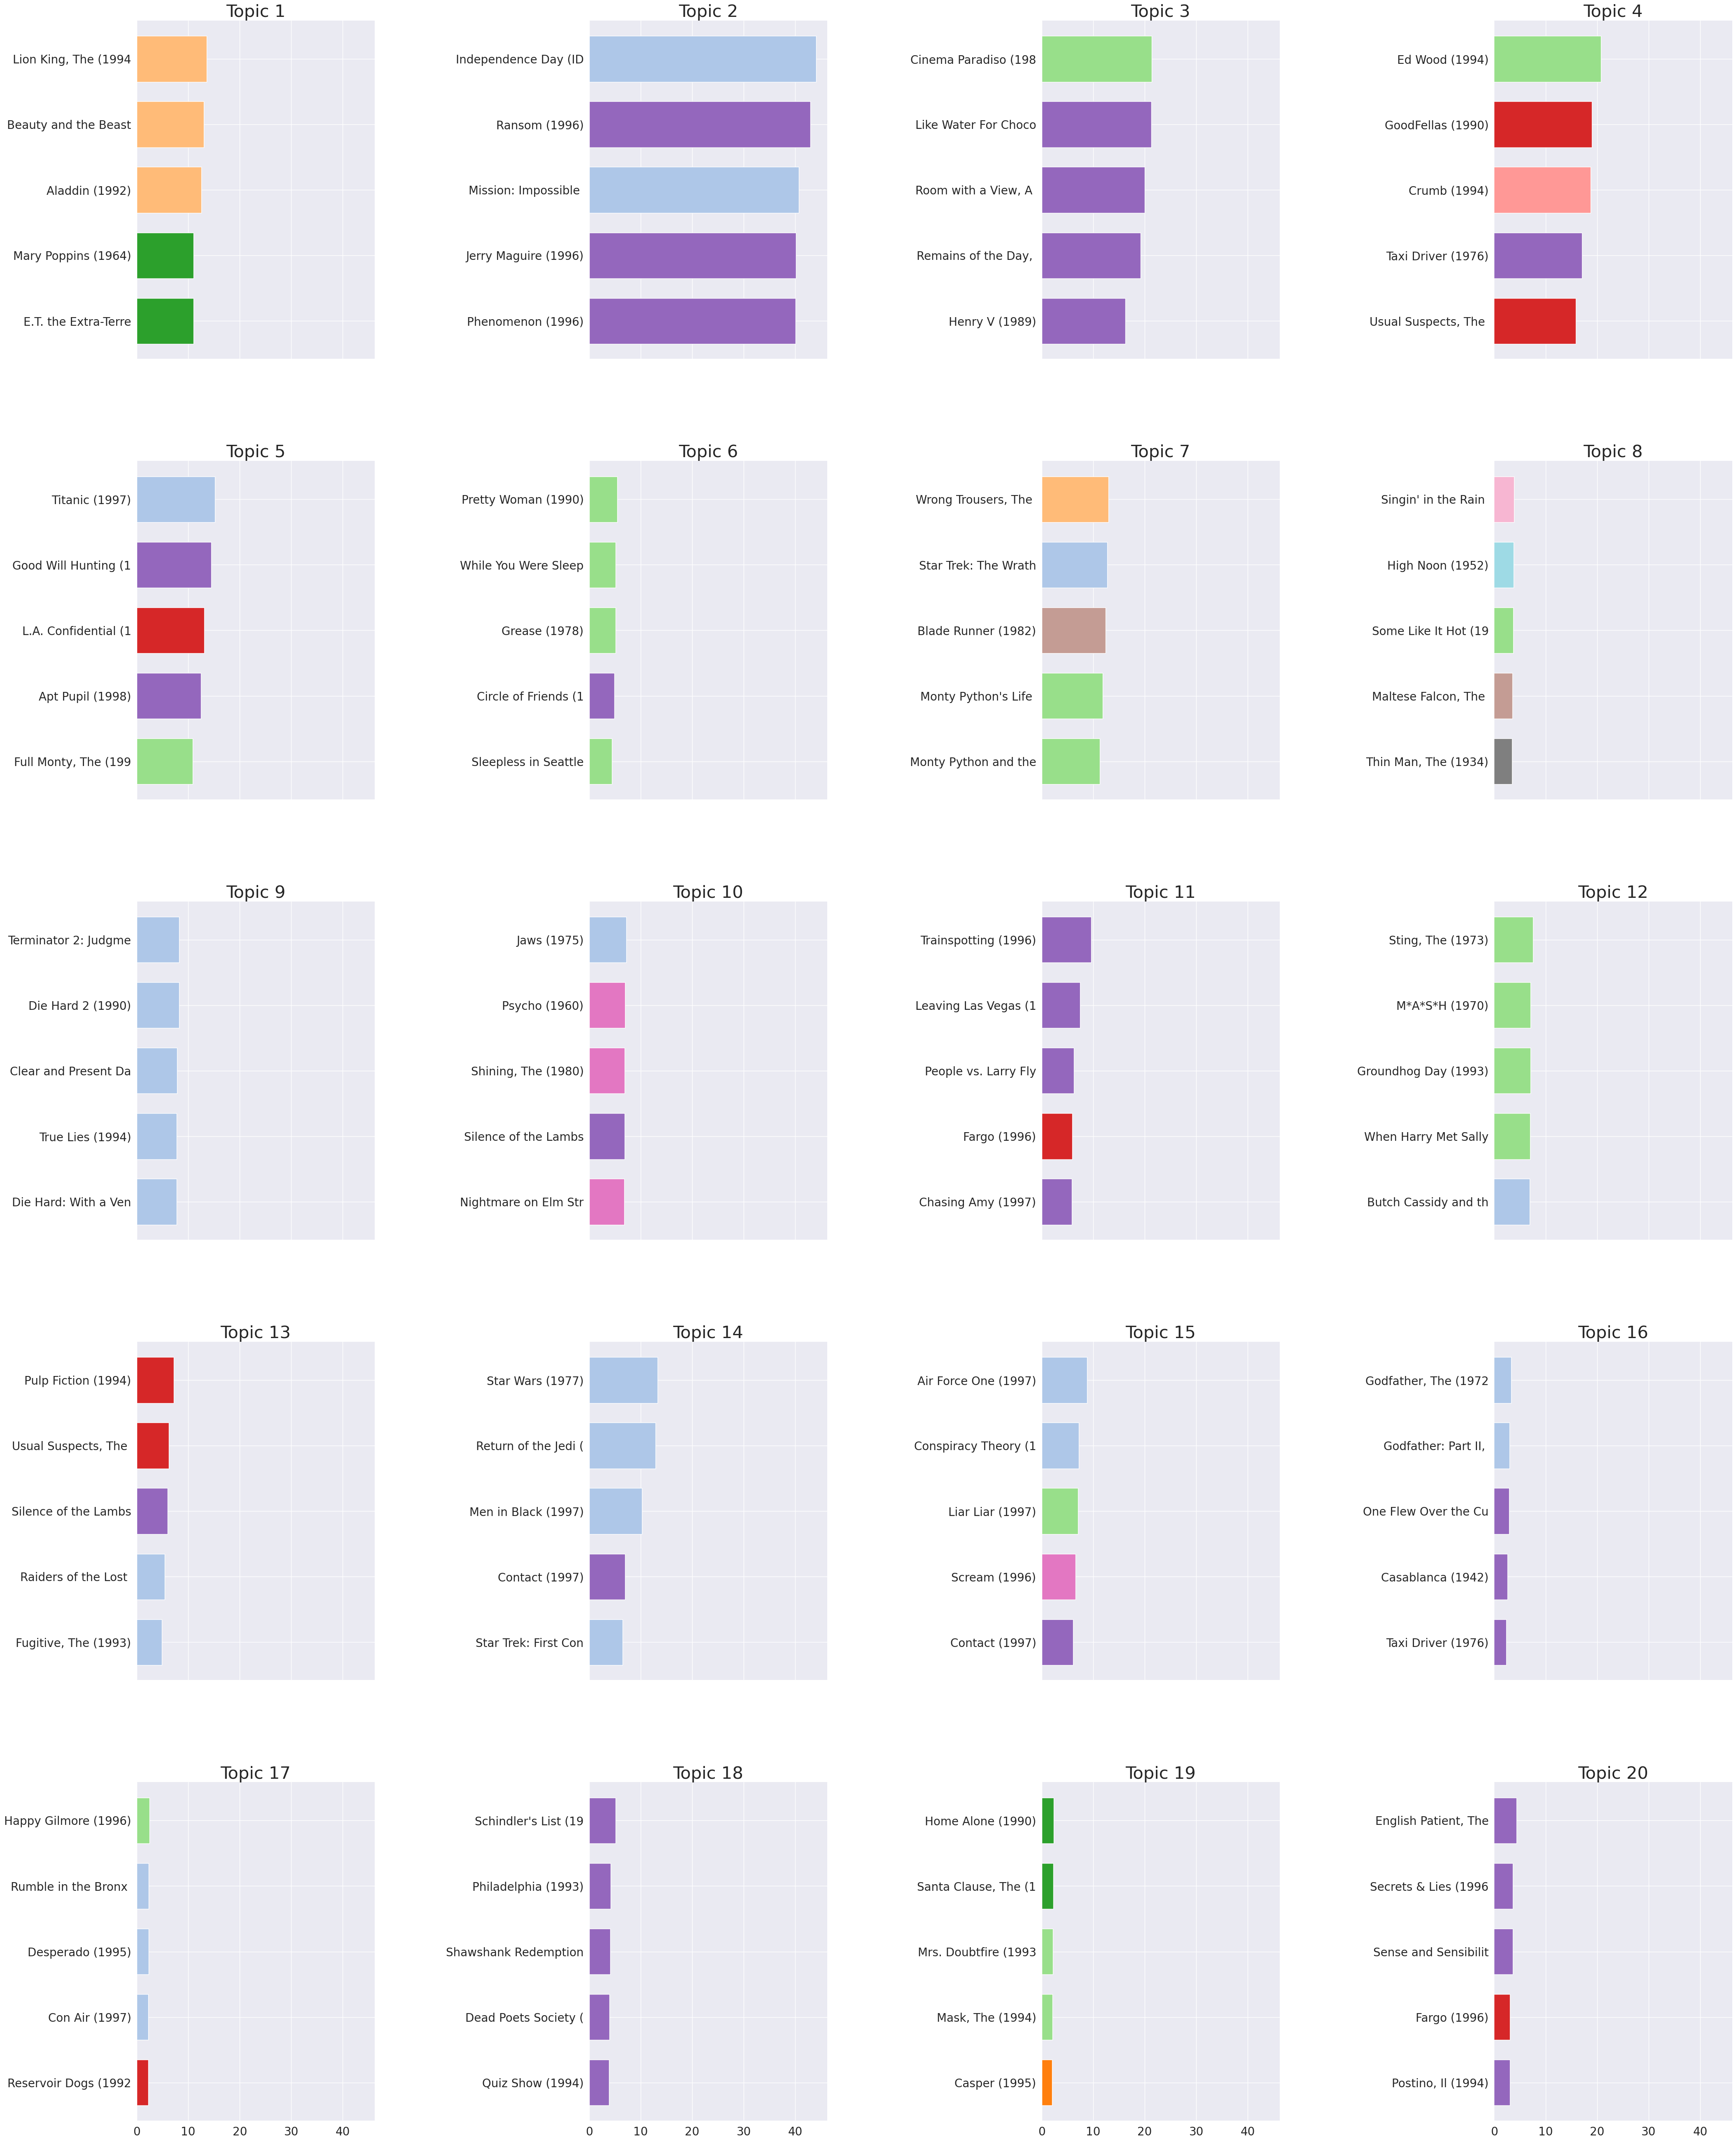

In [62]:
n_top_words = 5
fig, axes = plt.subplots(5, 4, figsize=(50, 60), sharex=True)
axes = axes.flatten()
cmap = plt.get_cmap('tab20', len(genre))

for i in range(H.shape[0]):
    topic = H[i, :]
    top_features = topic.argsort()[: -n_top_words - 1 : -1]
    top_features_names = [movies_df["Title"][j][:20] for j in top_features]
    top_features_scores = [topic[j] for j in top_features]
    top_features_genres = [movies_df["Genre"][j] for j in top_features]
    top_cmap = colors.ListedColormap(cmap.colors[top_features_genres])
    
    ax = axes[i]
    ax.barh(top_features_names, top_features_scores, height=0.7, color=top_cmap.colors)
    ax.set_title(f"Topic {i+1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

### Reconstructed user-item matrix.

##### <span style="color:purple">**Question:** What is the average reconstruction error?</span>

Consider only the true ratings, _i.e_ the ones present in the original dataset.

In [ ]:
### TO BE COMPLETED ### 
# Average reconstruction error

[...]

In [64]:
# %load solutions/reconstruction_error.py
R_pred = W.dot(H)

err = np.linalg.norm(R - R_pred) / (R.shape[0]*R.shape[1])
print("Average reconstruction error: %0.5f%%" % (err * 100))

Average reconstruction error: 0.05276%


##### <span style="color:purple">**Todo:** Observe the range of values taken by `R_pred`.</span>

1. What do you notice?
2. Suggest an improvement.

In [ ]:
### TO BE COMPLETED ### 
# Range of values

[...]

In [66]:
# %load solutions/reconstruction_error_range.py
print("Range of predicted ratings: %i to %i" % (R_pred.min(), R_pred.max()))

Range of predicted ratings: 0 to 9


In [ ]:
### TO BE COMPLETED ### 
# Improvement

[...]

In [78]:
# %load solutions/improve_prediction.py
print(R)
R_pred = W.dot(H)
R_pred[R_pred > 5] = 5.
R_pred[R_pred < 1] = 1.

print("")

print(R_pred.astype(np.int8))

[[5 3 4 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]]

[[4 1 1 ... 1 1 1]
 [2 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 1 ... 1 1 1]
 [1 2 1 ... 1 1 1]]


### Known User 

Let's start with the simplest situation: recommending new movies to a user already in our database.

##### <span style="color:purple">**Todo:** Select a user at random within the dataset and recommend five movies he has not seen.</span>

The recommended movies are the ones with highest reconstruction scores among the unseen movies. These predictions can be displayed as a dataframe: one column for the title, one for the prediction score and one for the genre of the predicted movie.

In [ ]:
### TO BE COMPLETED ### 
# Recommendations known user

n_recommendations = 5

user_idx = ...
user = users_df[users_df['User ID']==user_idx]

A = user.iloc[0]['Age']
G = user.iloc[0]['Gender']
O = user.iloc[0]['Occupation']
print("Recommended movies for user %i: A %i year old" % (user_idx, A), G, O,'\n')

# ----- #

[...]
    
predicted_movies

In [97]:
# %load solutions/reco_known_user.py
# Recommendations - known user

n_recommendations = 5

user_idx = np.random.randint(n_users)
user = users_df[users_df['User ID']==user_idx]

A = user.iloc[0]['Age']
G = user.iloc[0]['Gender']
O = user.iloc[0]['Occupation']
print("Recommended movies for user %i: A %i year old" % (user_idx, A), G, O,'\n')

# ----- #

ratings_user = R[user_idx, :]
predictions_user = R_pred[user_idx, :]

unseen_indices = np.where(ratings_user == 0)[0]
predictions_unseen = predictions_user[unseen_indices]

# ----- #

predicted_movies = pd.DataFrame(columns = ['Title', 'Rating', 'Genre'])
predicted_movies_index = np.argsort(-predictions_unseen)

for ii in predicted_movies_index[:5]:
    i = unseen_indices[ii]
    reco = {'Title':movies_df.iloc[i]['Title'], 
            'Rating':predictions_user[i], 
            'Genre':movies_df.iloc[i]['Genre']}
    reco = pd.DataFrame([reco])
    predicted_movies = pd.concat([predicted_movies, reco], axis=0, ignore_index=True)
    
predicted_movies

Recommended movies for user 381: A 33 year old M artist 



,Title,Rating,Genre
0,"Godfather: Part II, The (1974)",2.076654,1
1,Casablanca (1942),2.006746,8
2,Psycho (1960),1.542837,11
3,Raiders of the Lost Ark (1981),1.323858,1
4,Cool Hand Luke (1967),1.302064,5


##### <span style="color:purple">**Todo:** Display the predicted movies in a horizontal barplot.</span>

Using the [horizontal barplot of the topics](#topic_plot), draw a horizontal barplot where the length of the bars is given by the rating of the predicted movie, and its color by the genre of the movie.

In [80]:
### TO BE COMPLETED ### 
# Horizontal barplot

[...]

[Ellipsis]

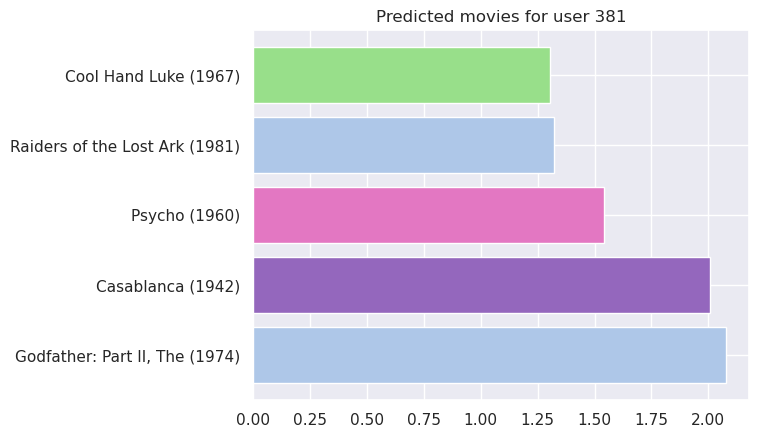

In [102]:
# %load solutions/horizontal_barplot.py
cmap = plt.get_cmap('tab20', len(genre))
cmap = colors.ListedColormap(cmap.colors[predicted_movies['Genre'].values.squeeze().tolist()])

plt.barh(predicted_movies['Title'].values, predicted_movies['Rating'].values, height=0.8, color=cmap.colors)
plt.title('Predicted movies for user %i' % user_idx)

plt.show()

##### <span style="color:purple">**Todo:** Compare the prediction with his/her favorite movies.</span>

1. Build the dataframe of these 5 favorite movies
2. Draw for these favorite movies the analog of the previous figure
3. Comment

In [ ]:
### TO BE COMPLETED ### 
# Favorite movies

[...]

In [99]:
# %load solutions/favorite_movies.py
# Favorite Movies

print("Favorite movies for user %i: A %i year old" % (user_idx, A), G, O,'\n')

# ----- #

favorite_movies = pd.DataFrame(columns = ['Title', 'Rating', 'Genre'])
favorite_movies_index = np.argsort(-ratings_user)

for i in favorite_movies_index[:5]:
    pref = {'Title':movies_df.iloc[i]['Title'], 
            'Rating':ratings_user[i], 
            'Genre':movies_df.iloc[i]['Genre']}
    pref = pd.DataFrame([pref])
    favorite_movies = pd.concat([favorite_movies, pref], axis=0, ignore_index=True)
    
favorite_movies

Favorite movies for user 381: A 33 year old M artist 



,Title,Rating,Genre
0,Some Like It Hot (1959),5,5
1,Bitter Moon (1992),5,8
2,Mars Attacks! (1996),5,1
3,Poison Ivy II (1995),5,8
4,Apocalypse Now (1979),5,8


In [ ]:
### TO BE COMPLETED ### 
# Visual comparison

[...]

User 381: A 33 year old M artist 



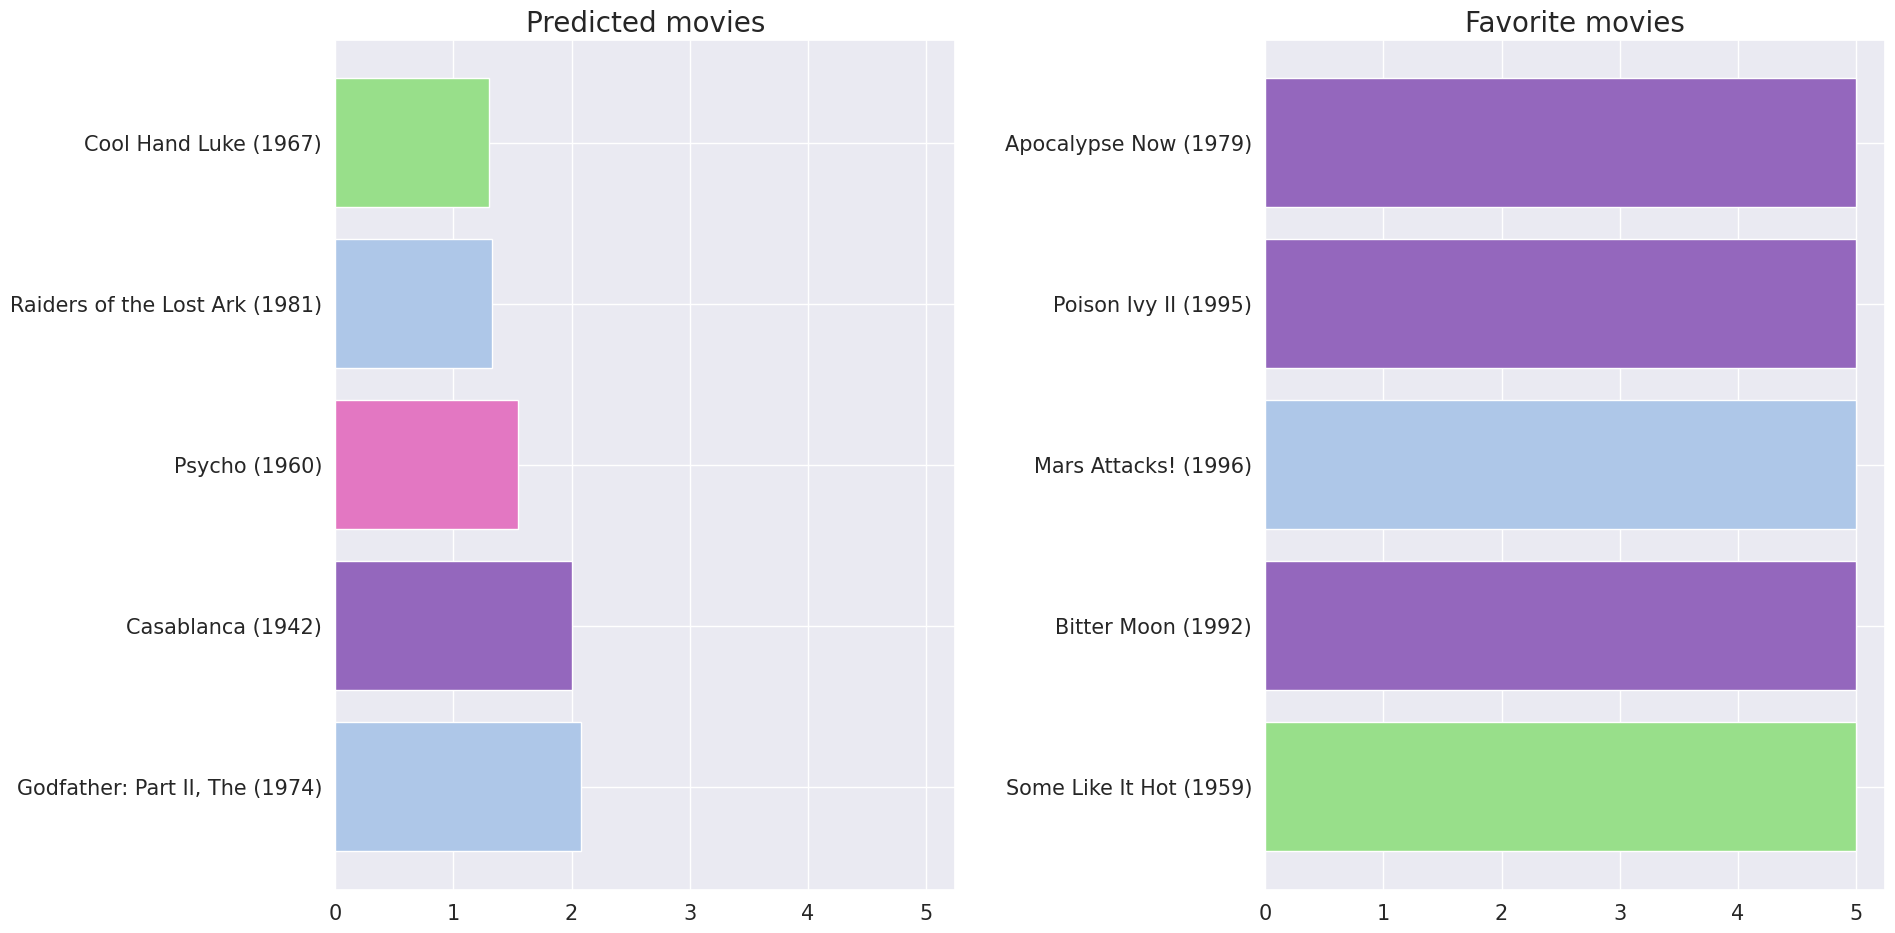

In [103]:
# %load solutions/visual_comparison.py
# Visual comparison

print("User %i: A %i year old" % (user_idx, A), G, O,'\n')

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharex=True)

# ----- #

ax = axes[0]
cmap = plt.get_cmap('tab20', len(genre))
cmap = colors.ListedColormap(cmap.colors[predicted_movies['Genre'].values.squeeze().tolist()])

ax.barh(predicted_movies['Title'].values, predicted_movies['Rating'].values,  height=0.8, color=cmap.colors)
ax.set_title('Predicted movies', fontdict={"fontsize": 20})
ax.tick_params(axis="both", which="major", labelsize=15)

# ----- #

ax = axes[1]
cmap = plt.get_cmap('tab20', len(genre))
cmap = colors.ListedColormap(cmap.colors[favorite_movies['Genre'].values.squeeze().tolist()])

ax.barh(favorite_movies['Title'].values, favorite_movies['Rating'].values,  height=0.8, color=cmap.colors)
ax.set_title('Favorite movies', fontdict={"fontsize": 20})
ax.tick_params(axis="both", which="major", labelsize=15)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.50, hspace=0.3)
plt.show()

##### <span style="color:purple">**Todo:** Find the three "topics" used by the NMF algorithm to choose the recommendations.</span>

In [ ]:
### TO BE COMPLETED ### 
# Top topics

top_topics = ...

[...]

In [105]:
# %load solutions/top_topics.py
# Top topics

topics_used = W[user_idx, :]
top_topics = topics_used.argsort()[: -3 - 1 : -1]
top_topics.sort()
print("Top topics: %i, %i, %i" % tuple(top_topics + 1))

Top topics: 5, 11, 16


As a reminder, these are the topics associated with the following films: 

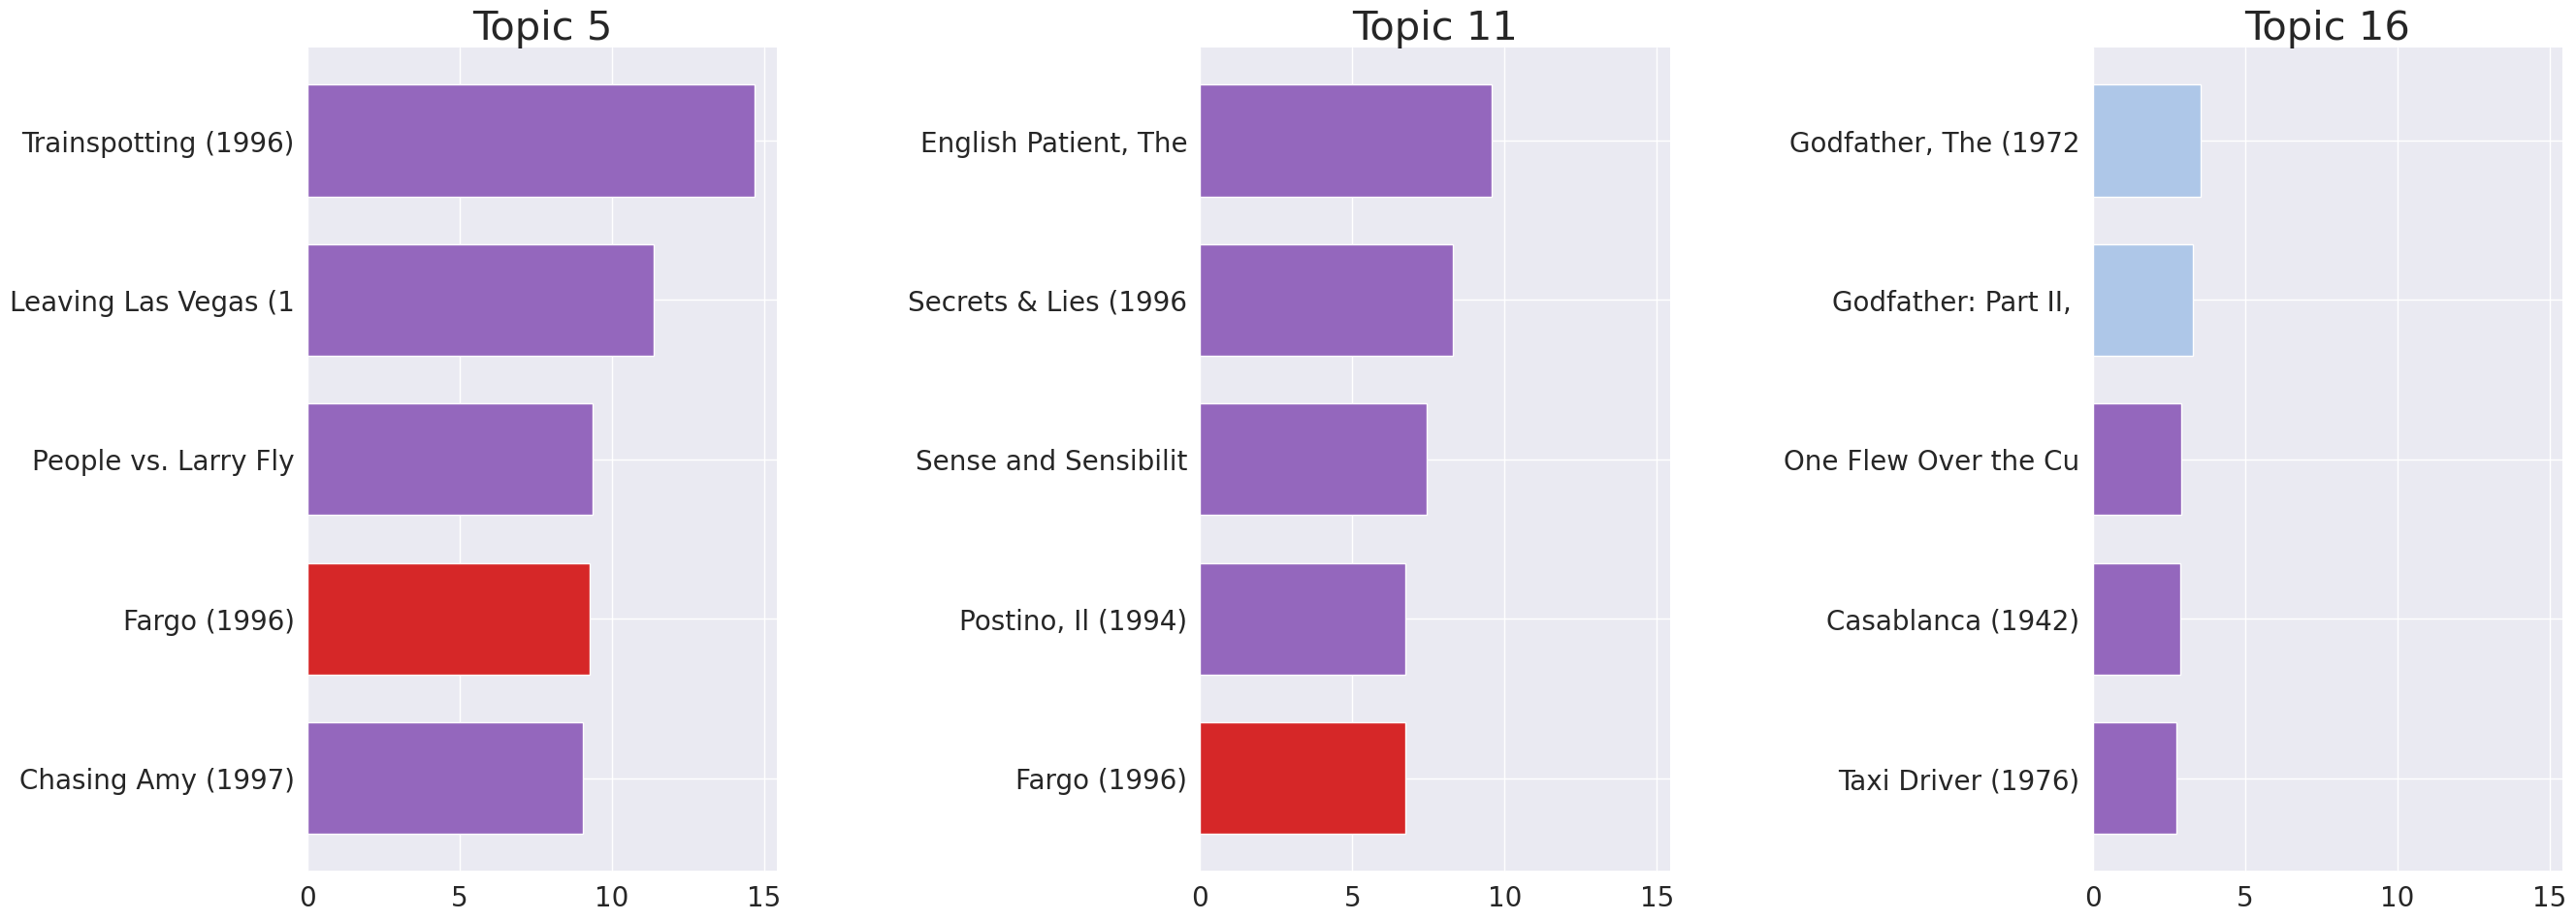

In [106]:
n_top_words = 5
fig, axes = plt.subplots(1, 3, figsize=(30, 10), sharex=True)
axes = axes.flatten()
cmap = plt.get_cmap('tab20', len(genre))

for idx, i in enumerate(top_topics):
    topic = H[i, :]
    top_features = topic.argsort()[: -n_top_words - 1 : -1]
    top_features_names = [movies_df["Title"][j][:20] for j in top_features]
    top_features_scores = [topic[j] for j in top_features]
    top_features_genres = [movies_df["Genre"][j] for j in top_features]
    top_cmap = colors.ListedColormap(cmap.colors[top_features_genres])
    
    ax = axes[idx]
    ax.barh(top_features_names, top_features_scores, height=0.7, color=top_cmap.colors)
    ax.set_title(f"Topic {i+1}", fontdict={"fontsize": 30})
    ax.invert_yaxis()
    ax.tick_params(axis="both", which="major", labelsize=20)
    for i in "top right left".split():
        ax.spines[i].set_visible(False)

plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
plt.show()

### New user with rating history

##### <span style="color:purple">**Todo:** Create a new user, or use the `new_user.txt` file.</span>

In [ ]:
### TO BE COMPLETED ### 
# New user

[...]

In [127]:
# %load new_user.txt
my_ratings = np.zeros((1682,1), dtype=int)
my_ratings[0] = 4
my_ratings[1] = 4
my_ratings[10] = 1
my_ratings[15] = 3
my_ratings[27] = 4
my_ratings[34] = 1
my_ratings[49] = 1
my_ratings[55] = 1
my_ratings[61] = 1
my_ratings[68] = 5
my_ratings[70] = 4
my_ratings[81] = 4
my_ratings[87] = 2
my_ratings[94] = 4
my_ratings[120] = 2
my_ratings[171] = 1
my_ratings[173] = 4
my_ratings[175] = 1
my_ratings[182] = 1
my_ratings[194] = 2
my_ratings[203] = 5
my_ratings[209] = 5
my_ratings[221] = 1
my_ratings[234] = 2
my_ratings[312] = 3
my_ratings[317] = 3
my_ratings[322] = 3
my_ratings[342] = 1
my_ratings[378] = 1
my_ratings[379] = 1
my_ratings[392] = 3
my_ratings[404] = 2
my_ratings[422] = 4
my_ratings[542] = 4

##### <span style="color:purple">**Todo:** Make recommendations for this new user.</span>

1. Update the user-item matrix,
2. Retrain the NMF model with the new matrix,
3. Make 5 recommendation for this new user,
4. Visually compare predictions and favorite movies.

_Note: Beware of the values taken by the predicted scores!_

In [ ]:
### TO BE COMPLETED ### 
# Recompute NMF

[...]

In [128]:
# %load solutions/nmf_new_user_history.py
# Recompute NMF

newR = np.r_[R, my_ratings.T]

new_nmf = NMF(n_components=20, init="nndsvda", max_iter=int(1e3))
new_nmf.fit(newR)
newW = new_nmf.transform(newR)
newH = new_nmf.components_

newR_pred = newW.dot(newH)
newR_pred[newR_pred > 5] = 5.
newR_pred[newR_pred < 1] = 1.

In [ ]:
### TO BE COMPLETED ### 
# Make recommendations

[...]

In [129]:
# %load solutions/reco_new_user_history.py
# Make recommendations

n_recommendations = 5

ratings_user = newR[-1, :]
predictions_user = newR_pred[-1, :]


# ----- #
# Favorite movies

favorite_movies = pd.DataFrame(columns = ['Title', 'Rating', 'Genre'])
favorite_movies_index = np.argsort(-ratings_user)

for i in favorite_movies_index[:5]:
    pref = {'Title':movies_df.iloc[i]['Title'], 
            'Rating':ratings_user[i], 
            'Genre':movies_df.iloc[i]['Genre']}
    pref = pd.DataFrame([pref])
    favorite_movies = pd.concat([favorite_movies, pref], axis=0, ignore_index=True)
    

# ----- #
# Predicted movies

unseen_indices = np.where(ratings_user == 0)[0]
predictions_unseen = predictions_user[unseen_indices]

predicted_movies = pd.DataFrame(columns = ['Title', 'Rating', 'Genre'])
predicted_movies_index = np.argsort(-predictions_unseen)

for ii in predicted_movies_index[:5]:
    i = unseen_indices[ii]
    reco = {'Title':movies_df.iloc[i]['Title'], 
            'Rating':predictions_user[i], 
            'Genre':movies_df.iloc[i]['Genre']}
    reco = pd.DataFrame([reco])
    predicted_movies = pd.concat([predicted_movies, reco], axis=0, ignore_index=True)
    
    
# ----- #

print('Favorite movies:')
display(favorite_movies)
print('')
print('Predicted movies:')
display(predicted_movies)

Favorite movies:


,Title,Rating,Genre
0,Forrest Gump (1994),5,5
1,Back to the Future (1985),5,5
2,Indiana Jones and the Last Crusade (1989),5,1
3,Toy Story (1995),4,3
4,GoldenEye (1995),4,1



Predicted movies:


,Title,Rating,Genre
0,Beauty and the Beast (1991),1.564090,3
1,It's a Wonderful Life (1946),1.386021,8
2,"Sound of Music, The (1965)",1.313234,12
3,Mary Poppins (1964),1.307651,4
4,Snow White and the Seven Dwarfs (1937),1.268553,3


In [ ]:
### TO BE COMPLETED ### 
# Visual comparison

[...]

In [ ]:
# %load solutions/visual_comparison_new_user_history.py

In [130]:
# Top topics

topics_used = newW[-1, :]
top_topics = topics_used.argsort()[: -3 - 1 : -1]
top_topics.sort()
print("Top topics: %i, %i, %i" % tuple(top_topics + 1))

Top topics: 4, 13, 15


### New user with no rating history

The last case is that of a new user with no rating history, but currently watching a movie from our corpus. 

Without a history of notes, we will not be able to proceed as before. The idea here is, by placing ourselves in the "movies embedding" induced by the NMF decomposition, to compute a dissimilarity measure between the different movies and to recommend a movie close to the currently watched movie, in the sense of this dissimilarity. The underlying intuition is that the movie embedding of the NMF decomposition induces a good understanding of the movie corpus. 

We use [cosine similarity](https://en.wikipedia.org/wiki/Cosine_similarity) to measure the similarity between movies. Other choices are possible.

In [113]:
from sklearn.metrics.pairwise import cosine_similarity

##### <span style="color:purple">**Todo:** Compute the similarity between movies.</span>

1. Compute the movie-to-movie similarity matrix using the [cosine_similarity](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.cosine_similarity.html) function,
2. Display the image representing this similarity.

In [ ]:
### TO BE COMPLETED ### 
# Movies similarity

[...]

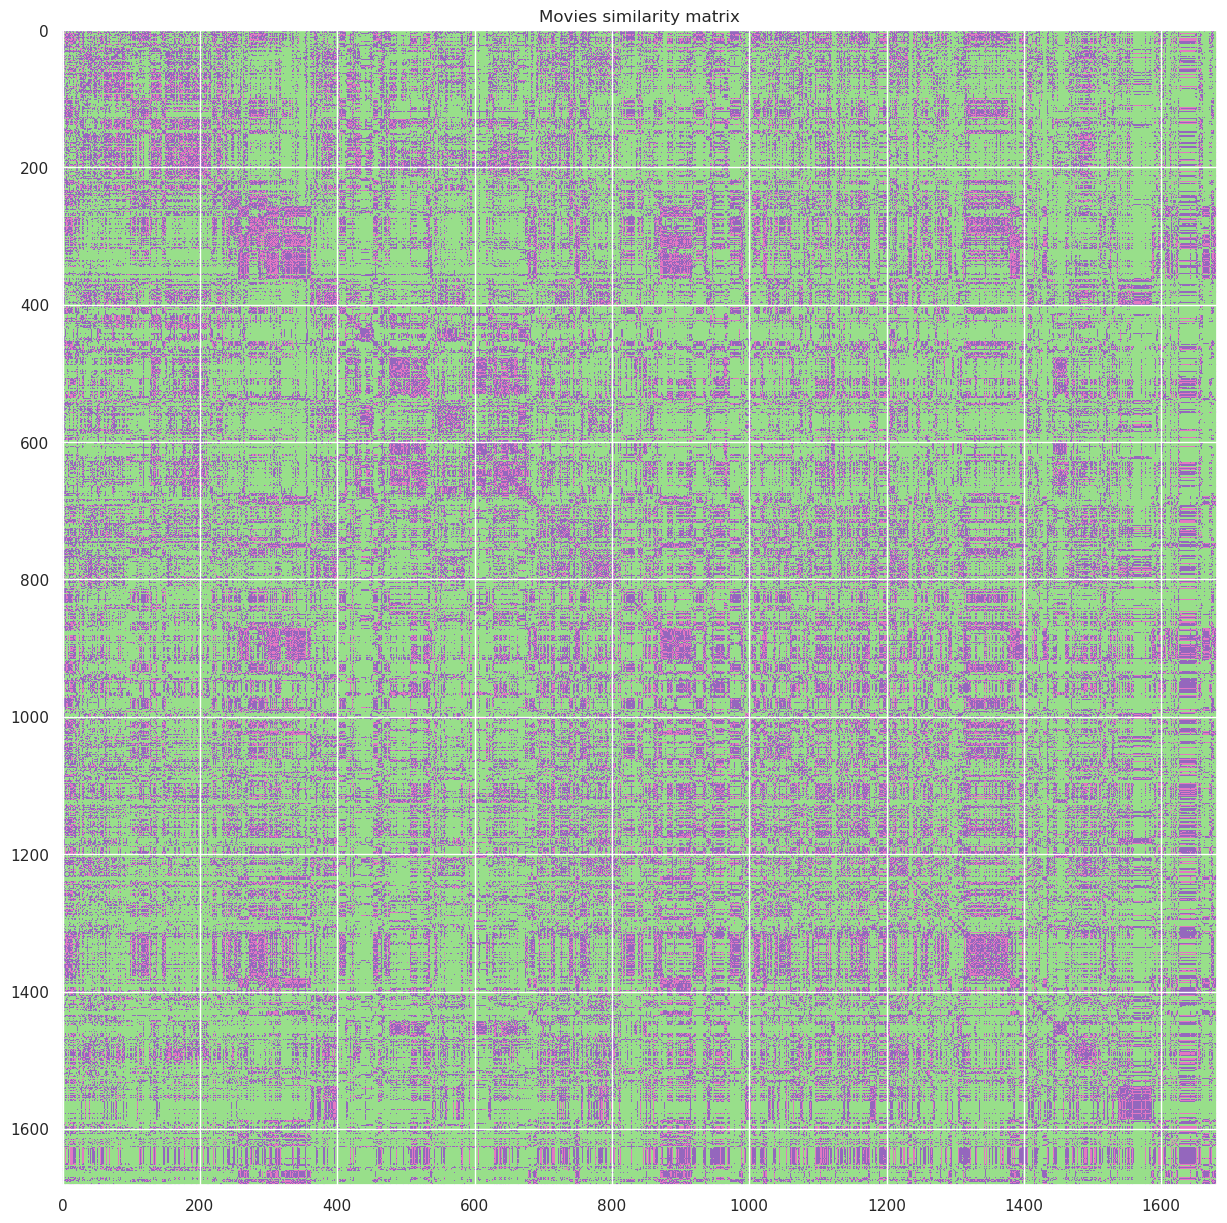

In [131]:
# %load solutions/movies_similarity.py
movies_similarities = cosine_similarity(H.T)

plt.figure(figsize=(15,15))
plt.imshow(movies_similarities, cmap=cmap)
plt.title("Movies similarity matrix")
plt.show()

##### <span style="color:purple">**Todo:** Recommend the most similar movie to what the new user is watching.</span>

The movie currently being watched can be chosen at random.

In [ ]:
### TO BE COMPLETED ### 
# Suggested movies

[...]

In [132]:
# %load solutions/suggested_movies.py
# Suggested movies

n_recommendations = 5

watch_index = np.random.randint(0, len(movies_df["Title"]))
watch_title = movies_df.iloc[watch_index]['Title']
print("Suggested movies for user (without history) currently watching", watch_title,'\n')

# ----- #

movies_sim = movies_similarities[watch_index, :]
suggestions = np.argsort(-movies_sim)[1:n_recommendations + 1]

suggested_movies = pd.DataFrame(columns = ['Title', 'Genre', 'Similarity'])

for i in suggestions:
    suggest = {'Title':movies_df.iloc[i]['Title'], 
            'Similarity':movies_sim[i], 
            'Genre':movies_df.iloc[i]['Genre']}
    suggest = pd.DataFrame([suggest])
    suggested_movies = pd.concat([suggested_movies, suggest], axis=0, ignore_index=True)

suggested_movies

Suggested movies for user (without history) currently watching Michael Collins (1996) 



,Title,Genre,Similarity
0,Touch (1997),14,0.981720
1,Venice/Venice (1992),8,0.978652
2,"Spitfire Grill, The (1996)",8,0.977112
3,Two Bits (1995),8,0.975073
4,Before and After (1996),8,0.971584


In [ ]:
### TO BE COMPLETED ### 
# Visualise suggestion

[...]

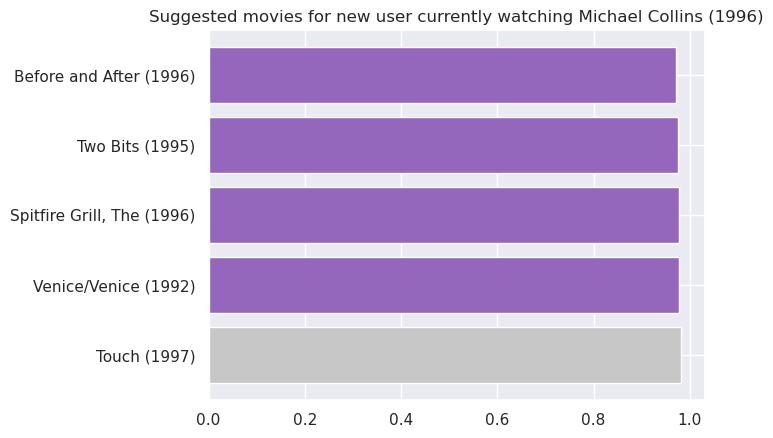

In [133]:
# %load solutions/visualise_suggestion.py
# Visualise suggestion

cmap = plt.get_cmap('tab20', len(genre))
cmap = colors.ListedColormap(cmap.colors[suggested_movies['Genre'].values.squeeze().tolist()])

plt.barh(suggested_movies['Title'].values, suggested_movies['Similarity'].values, height=0.8, color=cmap.colors)
plt.title("Suggested movies for new user currently watching "+watch_title)

plt.show()

## Optimize NMF parameters <span style="color:purple">(To go further)</span>

The next step is to optimize different parameters influencing the NMF model. To do so, you can conduct a K-fold cross-validation. You may choose $K=5$.

More precisely, we aim to select the optimal parameters for the [NMF scikit function](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.NMF.html): $\texttt{n_components}$, $\texttt{solver}$, $\texttt{init}$, $\texttt{beta_loss}$, $\texttt{alpha_W}$, $\texttt{alpha_H}$, and $\texttt{l1_ratio}$. You can choose three values per parameters and test all combinations through a grid search.

In [134]:
from sklearn.model_selection import train_test_split, ShuffleSplit
from sklearn.metrics import mean_squared_error

The function below creates the [user-item matrix](#user-item-matrix) $R$ from the numpy-array matrices $X$ and $y$.

- $\texttt{X = ratings_df[['User ID','Movie ID']].values}$
- $\texttt{y = ratings_df['Rating'].values}$

In [135]:
def make_R(X, y, shape):
    # X = ratings_df[['User ID','Movie ID']].values
    # y = ratings_df['Rating'].values
    
    matrix_sparse = sparse.csr_matrix((y, (X[:,0], X[:,1])), shape=(shape[0]+1,shape[1]+1))
    R = matrix_sparse.todense()
    R = np.array(R[1:, 1:])
    
    return R

##### <span style="color:purple">**Todo:** Split the data set into a training set and a test set.</span>

We will perform the cross-validation only on the training set. The test set will be used to validate a posteriori the procedure on data that were not used to train the NMF decomposition.

In [ ]:
### TO BE COMPLETED ### 
# Train-vs-Test

[...]

In [137]:
# %load solutions/split_train_test.py
R_shape = (n_users, n_items)
X = ratings_df[['User ID','Movie ID']].values
y = ratings_df['Rating'].values

# ----- #

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

R_train = make_R(X_train, y_train, R_shape)
R_test = make_R(X_test, y_test, R_shape)

We will need to evaluate the error (RMSE) to adjust the hyperparameters.

In [138]:
def get_rmse(pred, actual):
    pred = pred[actual.nonzero()].flatten()     # Ignore nonzero terms
    actual = actual[actual.nonzero()].flatten() # Ignore nonzero terms
    return np.sqrt(mean_squared_error(pred, actual))

##### <span style="color:purple">**Todo:** Find the optimal parameters.</span>

You can use the [`ShuffleSplit`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html) function.

In [ ]:
### TO BE COMPLETED ### 
# Cross-Validation

[...]

In [140]:
# %load solutions/cross_validation.py
param = {
    'n_components' : [15, 20, 25],
    'alpha_W' : [0.001, 0.01, 0.1],
    'l1_ratio' : [0], 
    'max_iter' : [500, int(1e3), int(1e4)]
}
n_search = 3**3

# Keep track of RMSE and parameters
grid_search = pd.DataFrame(columns = ['n_components', 'alpha_W', 'l1_ratio', 'max_iter', 'RMSE'])

# nb of folds in ShuffleSplit CV
n_folds = 5   
cv = ShuffleSplit(n_splits=5, test_size=0.33, random_state=0) # 5-fold scheme

i = 0
# Performing the Grid search
for n_components in param['n_components']:
    for alpha_W in param['alpha_W']:
        for l1_ratio in param['l1_ratio']:
            for max_iter in param['max_iter']:

                err = 0
                n_iter = 0
                i += 1
                print('---')
                print('Search %i / %i' % (i, n_search))
                for _, (train_index, test_index) in enumerate(cv.split(X_train)):
    
                    # Split into training and test set
                    X_train_cv, X_test_cv = X_train[train_index], X_train[test_index]
                    y_train_cv, y_test_cv = y_train[train_index], y_train[test_index]
            
                    # Construct the R matrices
                    R_train = make_R(X_train_cv, y_train_cv, R_shape)
                    R_test = make_R(X_test_cv, y_test_cv, R_shape)

                    # Current parameters for NMF decomposition
                    parametersNMF = {
                        'n_components' : n_components,
                        'init' : 'nndsvda', 
                        'alpha_W' : alpha_W,
                        'l1_ratio' : l1_ratio,
                        'max_iter' : max_iter
                    }
                    nmf = NMF(**parametersNMF)
                
                    # Train the NMF model
                    t0 = time.time()
                    nmf.fit(R_train)  
                    W = nmf.transform(R_train)
                    H = nmf.components_
                    n_iter += nmf.n_iter_ 

                    # Make predictions & clip values
                    R_pred = W.dot(H)
                    R_pred[R_pred > 5] = 5.
                    R_pred[R_pred < 1] = 1.

                    # Computing the error on the validation set 
                    err += get_rmse(R_pred, R_test)
        
                #print "RMSE Error : ", err / n_folds
                grid_search.loc[i] = [n_components, alpha_W, l1_ratio, max_iter, err/n_folds]
                print("n_components: %i, alpha_W: %f, l1_ratio: %f, max_iter: %i, RMSE: %f" % (n_components, alpha_W, l1_ratio, max_iter, err/n_folds))
                print("Mean number of iterations: %i" % (n_iter/n_folds))
    
                
best_params = grid_search.sort_values('RMSE')[:1]
print('\n*** best params ***')
print(best_params)

---
Search 1 / 27
n_components: 15, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.676485
Mean number of iterations: 336
---
Search 2 / 27
n_components: 15, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.676624
Mean number of iterations: 460
---
Search 3 / 27
n_components: 15, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.676460
Mean number of iterations: 396
---
Search 4 / 27


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


n_components: 15, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.694598
Mean number of iterations: 361
---
Search 5 / 27
n_components: 15, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.694746
Mean number of iterations: 288
---
Search 6 / 27
n_components: 15, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.695447
Mean number of iterations: 361
---
Search 7 / 27
n_components: 15, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.766357
Mean number of iterations: 24
---
Search 8 / 27
n_components: 15, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.766357
Mean number of iterations: 25
---
Search 9 / 27
n_components: 15, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.766357
Mean number of iterations: 25
---
Search 10 / 27


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


n_components: 20, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.681780
Mean number of iterations: 395
---
Search 11 / 27
n_components: 20, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.679690
Mean number of iterations: 364
---
Search 12 / 27
n_components: 20, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.679898
Mean number of iterations: 457
---
Search 13 / 27


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(
/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


n_components: 20, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.699552
Mean number of iterations: 382
---
Search 14 / 27
n_components: 20, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.698651
Mean number of iterations: 321
---
Search 15 / 27
n_components: 20, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.699566
Mean number of iterations: 404
---
Search 16 / 27
n_components: 20, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.766357
Mean number of iterations: 21
---
Search 17 / 27
n_components: 20, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.766357
Mean number of iterations: 20
---
Search 18 / 27
n_components: 20, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.766357
Mean number of iterations: 20
---
Search 19 / 27


/usr/local/insa/anaconda/lib/python3.11/site-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 500 reached. Increase it to improve convergence.
  warnings.warn(


n_components: 25, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.685582
Mean number of iterations: 359
---
Search 20 / 27
n_components: 25, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.686427
Mean number of iterations: 421
---
Search 21 / 27
n_components: 25, alpha_W: 0.001000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.685352
Mean number of iterations: 333
---
Search 22 / 27
n_components: 25, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.703637
Mean number of iterations: 361
---
Search 23 / 27
n_components: 25, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 1000, RMSE: 2.703236
Mean number of iterations: 389
---
Search 24 / 27
n_components: 25, alpha_W: 0.010000, l1_ratio: 0.000000, max_iter: 10000, RMSE: 2.703804
Mean number of iterations: 474
---
Search 25 / 27
n_components: 25, alpha_W: 0.100000, l1_ratio: 0.000000, max_iter: 500, RMSE: 2.766357
Mean number of iterations: 18
---
Search 26 / 27
n_components: 25, alpha_W: 0.100000,

##### <span style="color:purple">**Todo:** Evaluate the model obtained on the test set.</span>


In [ ]:
### TO BE COMPLETED ### 
# Final evaluation

[...]

In [142]:
# %load solutions/final_evaluation.py
parametersNMF_opt = {
    'n_components' : 15,
    'init' : 'nndsvda', 
    'alpha_W' : 0.001,
    'l1_ratio' : 0,
    'max_iter' : int(1e4)
}

nmf = NMF(**parametersNMF_opt)
     
# Train
nmf.fit(R_train)  
W = nmf.transform(R_train)
H = nmf.components_

# Make predictionscPickle
R_pred = W.dot(H)
R_pred[R_pred > 5] = 5.
R_pred[R_pred < 1] = 1.

# Compute error on the test set 
print('RMSE test:', get_rmse(R_pred, R_test))

RMSE test: 2.676114725349327
